In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots


In [2]:
#read dataset

df=pd.read_csv("AusApparalSales4thQrt2020.csv",parse_dates = ['Date'])

In [3]:
#memory useage in coloums
df.memory_usage(deep=True)

Index       132
Date      60480
Time     496440
State    457920
Group    474390
Unit      60480
Sales     60480
dtype: int64

In [4]:
#top 5 rows of dataset
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [5]:
#number of rows
len(df)

7560

In [6]:
#concise summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [7]:
#stats of numeric data columns
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [8]:
#check duplicates
print(df[df.duplicated()])

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [9]:
# to understand different variables in a column
print(df["Time"].unique())
print(df["State"].unique())
print(df["Group"].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


In [10]:
#change data type, df['Time'] = df['Time'].astype('string') or
df=df.astype({"Time":"string","State":"string","Group":"string"})

In [11]:
#different data types
df.dtypes

Date     datetime64[ns]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

In [12]:
#identifying null data
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [13]:
#min and max of unit and sales
print(df["Unit"].describe()[["min","max"]])
print(df["Sales"].describe()[["min","max"]])

min     2.0
max    65.0
Name: Unit, dtype: float64
min      5000.0
max    162500.0
Name: Sales, dtype: float64


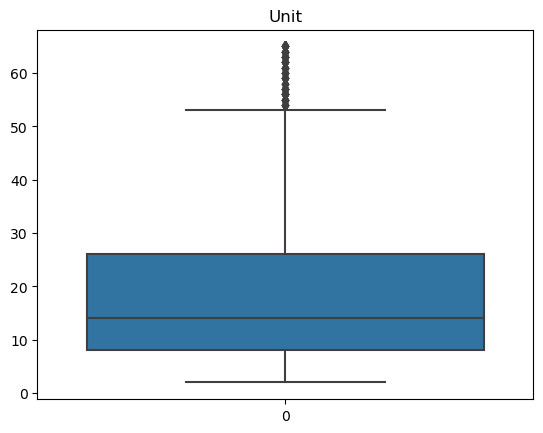

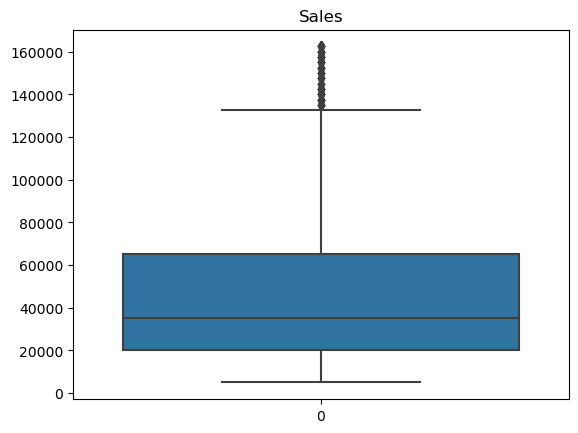

The upper and lower limit of unit are 53.0 and -19.0
The upper and lower limit of sales are 132500.0 and -47500.0


,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [14]:
#boxplot of unit and sales (showing outliers)
sns.boxplot(df["Unit"])
plt.title("Unit")
plt.show()

sns.boxplot(df["Sales"])
plt.title("Sales")
plt.show()

#calculating upper and lower limit

_25,_75=np.percentile(df["Unit"],[25,75])
irq=_75-_25
unit_upper=_75+1.5*irq
unit_lower=_25-1.5*irq
print("The upper and lower limit of unit are", unit_upper,"and", unit_lower)

_25,_75=np.percentile(df["Sales"],[25,75])
irq=_75-_25
sales_upper=_75+1.5*irq
sales_lower=_25-1.5*irq
print("The upper and lower limit of sales are", sales_upper,"and",sales_lower)




df.describe()

In [15]:
#normalization
scaler=MinMaxScaler()
df["normalized_unit"]=scaler.fit_transform(df[["Unit"]])
df["normalized_sales"]=scaler.fit_transform(df[["Sales"]])
df.describe()

,Date,Unit,Sales,normalized_unit,normalized_sales
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


In [16]:
#identifying not null
df.notna().sum()

Date                7560
Time                7560
State               7560
Group               7560
Unit                7560
Sales               7560
normalized_unit     7560
normalized_sales    7560
dtype: int64

In [17]:
#function to call sum of sales grouped by column
def gs(column):
    a=df.groupby(column).Sales.sum()
    return a

#by state
q =gs("State")
a=q.idxmax()
b=q.idxmin()
print("highest sales-{},lowest sales-{}".format(a,b))

highest sales- VIC,lowest sales- WA


In [18]:
#by group
w=gs("Group")
a=w.idxmax()
b=w.idxmin()
print("highest sales-{},lowest sales-{}".format(a,b))

highest sales- Men,lowest sales- Seniors


In [19]:
df.set_index("Date",inplace=True)
# weekly report
weekly_report=df.resample('W-MON').sum()
print("weekly report\n",weekly_report)

weekly report
                                                          Time  \
Date                                                            
2020-10-05   Morning Morning Morning Morning Afternoon Aft...   
2020-10-12   Morning Morning Morning Morning Afternoon Aft...   
2020-10-19   Morning Morning Morning Morning Afternoon Aft...   
2020-10-26   Morning Morning Morning Morning Afternoon Aft...   
2020-11-02   Morning Morning Morning Morning Afternoon Aft...   
2020-11-09   Morning Morning Morning Morning Afternoon Aft...   
2020-11-16   Morning Morning Morning Morning Afternoon Aft...   
2020-11-23   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-07   Morning Morning Morning Morning Afternoon Aft...   
2020-12-14   Morning Morning Morning Morning Afternoon Aft...   
2020-12-21   Morning Morning Morning Morning Afternoon Aft...   
2020-12-28   Morning Morning Morning Morning Afternoon Aft...   
2021-01-04

In [20]:
#monthly report
monthly_report=df.resample('M').sum()
print("monthly report:\n",monthly_report)

monthly report:
                                                          Time  \
Date                                                            
2020-10-31   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-10-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-11-30   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group   Unit  \
Date                                                                   
2020-10-31   Kids Men Women Seniors Kids Men Women Seniors...  45716   
2020-11-30   Kids Men Women Seniors Kids Men Women Seniors...  36273   
2020-12-31   Kids Men Women Seniors Kids Me

In [21]:
#quaterly report
quaterly_report=df.resample("Q").sum()
quaterly_report

,Time,State,Group,Unit,Sales,normalized_unit,normalized_sales
Date,,,,,,,
2020-12-31,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,136121,340302500,1920.650794,1920.650794


In [22]:
df_daily=df.resample("D").sum()

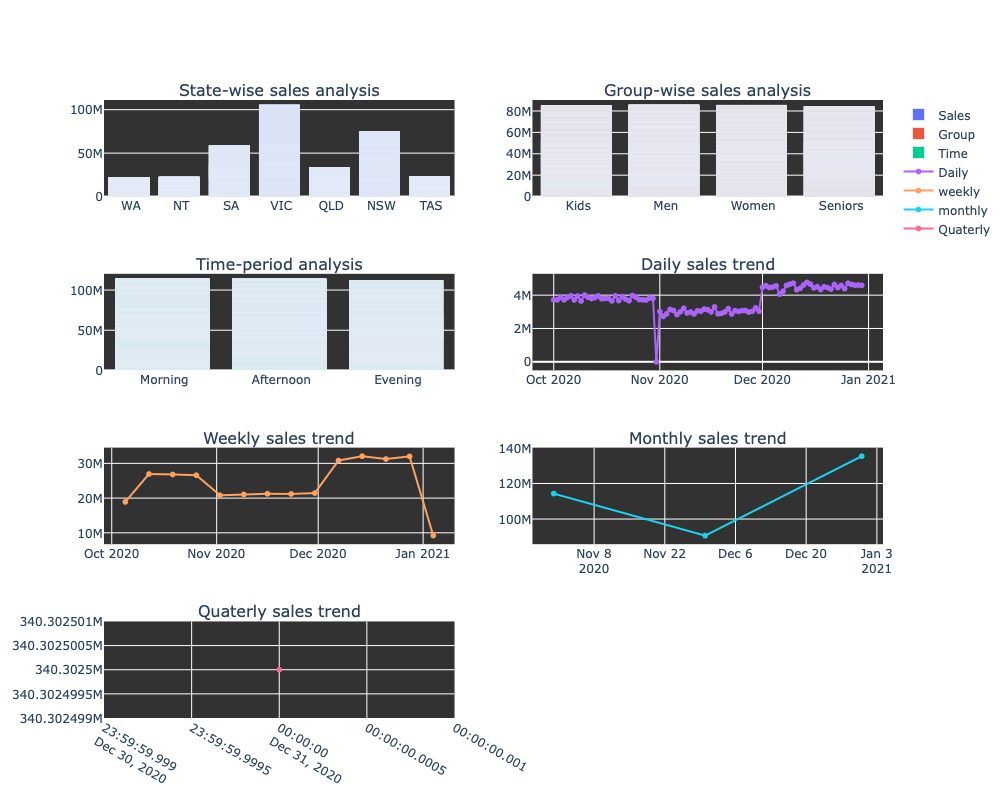

In [44]:
# defining subplots
fig = make_subplots(rows=4, cols=2, subplot_titles=("State-wise sales analysis",
                                                      "Group-wise sales analysis",
                                                      "Time-period analysis", 
                                                      "Daily sales trend",
                                                      "Weekly sales trend",
                                                      "Monthly sales trend",
                                                      "Quaterly sales trend"))
#State wise analysis
fig.add_trace(go.Bar(x=df["State"],y=df["Sales"],name="Sales"),row=1,col=1)

#group wise analysis
fig.add_trace(go.Bar(x=df["Group"],y=df["Sales"],name="Group"),row=1,col=2)

#Time of day analysis
fig.add_trace(go.Bar(x=df["Time"],y=df["Sales"],name="Time"),row=2,col=1)

#daily sales trend
fig.add_trace(go.Scatter(x=df_daily.index, y=df_daily["Sales"],mode="lines+markers", name="Daily"),row=2,col=2)

#weekly sales trend
fig.add_trace(go.Scatter(x=weekly_report.index, y=weekly_report["Sales"],mode="lines+markers",name="weekly"),row=3,col=1)

#monthly sales trend
fig.add_trace(go.Scatter(x=(monthly_report.index), y=monthly_report["Sales"],mode="lines+markers",name="monthly"),row=3,col=2)

#quaterly sales trend
fig.add_trace(go.Scatter(x=quaterly_report.index,y=quaterly_report["Sales"],mode="lines+markers",name="Quaterly"),row=4,col=1)


fig.update_layout(height=800,
                  width=1000,
                  plot_bgcolor="rgb(50,50,50)")
fig.show()

The different types of graphs help us to understand the dataset and the trend of sales.
The highest sales is in the city of VIC.
The 3 low performing cities in sales are WA, NT and TAS.
There are negligiable sales difference in group and time of the day analysis.
The daily sales trend shows a positive outcome, the recent week sales has seen a sharp dip and the monthly sales has increased by approx 200m compared to previous month.


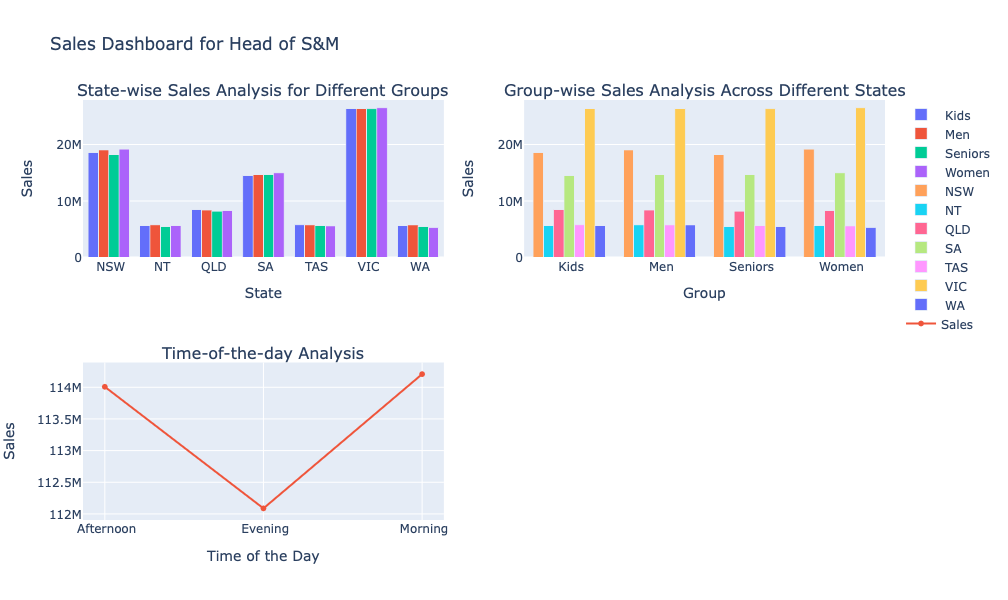

In [45]:


# State-wise sales analysis for different groups
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()

# Group-wise sales analysis across different states
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().unstack()

# Time-of-the-day analysis
time_sales = df.groupby('Time')['Sales'].sum()

# Creating the dashboard layout
fig = make_subplots(rows=2, cols=2, subplot_titles=("State-wise Sales Analysis for Different Groups",
                                                    "Group-wise Sales Analysis Across Different States",
                                                    "Time-of-the-day Analysis"))

# Adding traces (plots) to the dashboard

# State-wise sales analysis for different groups
for i, group in enumerate(state_group_sales.columns):
    fig.add_trace(go.Bar(x=state_group_sales.index, y=state_group_sales[group], name=group), row=1, col=1)

# Group-wise sales analysis across different states
for i, group in enumerate(group_state_sales.columns):
    fig.add_trace(go.Bar(x=group_state_sales.index, y=group_state_sales[group], name=group), row=1, col=2)

# Time-of-the-day analysis
fig.add_trace(go.Scatter(x=time_sales.index, y=time_sales.values, mode='lines+markers', name='Sales'), row=2, col=1)

# Updating layout
fig.update_layout(
    showlegend=True,
    title_text="Sales Dashboard for Head of S&M",
    height=600,
    width=1000,
)

# Adding axis labels and titles
fig.update_xaxes(title_text="State", row=1, col=1)
fig.update_yaxes(title_text="Sales", row=1, col=1)
fig.update_xaxes(title_text="Group", row=1, col=2)
fig.update_yaxes(title_text="Sales", row=1, col=2)
fig.update_xaxes(title_text="Time of the Day", row=2, col=1)
fig.update_yaxes(title_text="Sales", row=2, col=1)

# Displaying the dashboard
fig.show()
